<a href="https://colab.research.google.com/github/Christer-L/T-mixer/blob/master/droplet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd ..
# Load the Drive helper and mount
from google.colab import drive
import os
drive.mount('/content/drive/', force_remount=True)
path = "content/drive/My Drive/IPGG/Rheology/TP1"
os.chdir(path)
os.getcwd()

# Set file paths and define repositories with image data
root=r'./'



/
Mounted at /content/drive/


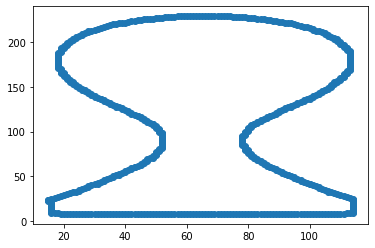

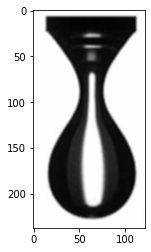

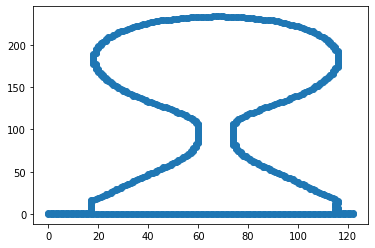

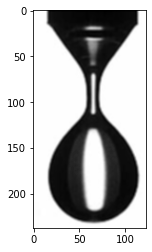

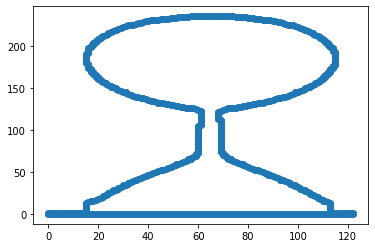

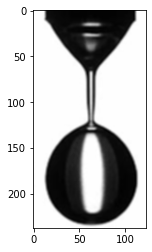

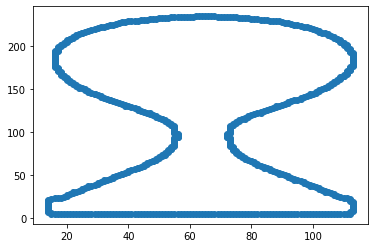

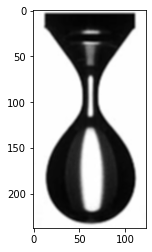

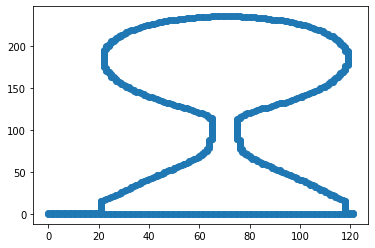

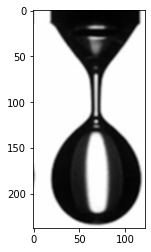

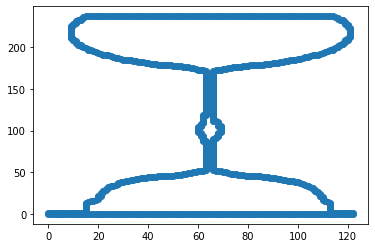

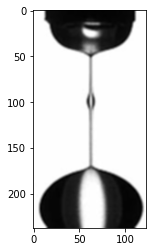

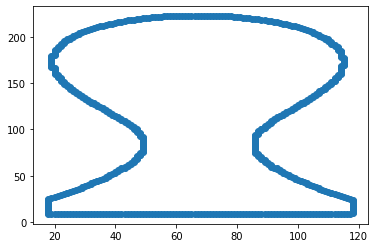

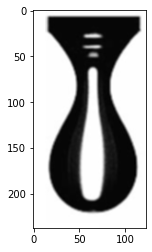

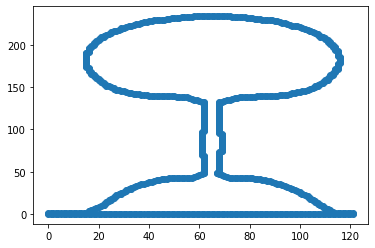

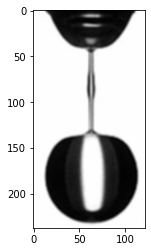

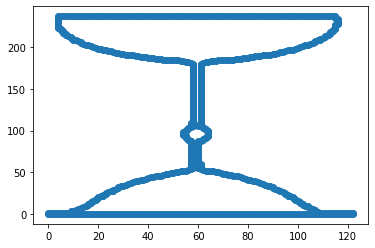

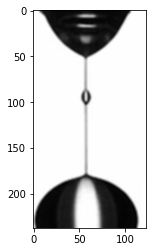

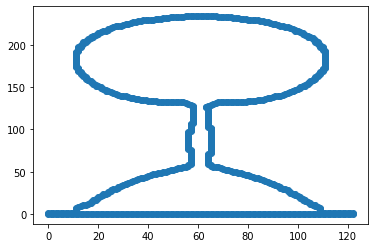

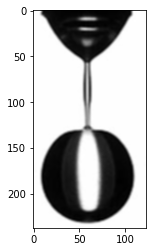

[-10.0, -6.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 7.0, 10.0]
[41, 28, 18, 14, 10, 9, 8, 6, 9, 9]


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Nov 16 09:53:07 2020

@author: lucas
"""

import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

folder=[r'Images_PEO_1Mio']
depth_k = len(folder)

kernel = np.ones((2,2),np.uint8)

for k in range(depth_k):
    path_k=root+folder[k]
    
    list_img=os.listdir(path_k)
    depth_j=len(list_img)
    
    time_seq = []
    widths = []

    for l in range(depth_j):
      time_seq.append(float(0))
      widths.append(float(0))

    for j in range(depth_j):
        # Opening the images and finding the edges
        path_current=path_k+"/"+list_img[j]
        data_flow = list_img[j].split("_")
        time_value = data_flow[2].split("ms")[0]
        time_value = float(time_value)
        time_seq[int(data_flow[1])] = time_value
        img=cv2.imread(path_current,-1)[:,:,0]
        img = cv2.blur(img,(3,3))
        binary = cv2.Canny(img,30,80) # canny edge detection function
        binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
        binary[0,:] = 255
        binary[-1,:] = 255
        
        contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
        
        for j in range(len(contours)):
            cv2.fillPoly(binary, pts =[contours[j]], color=(255,255,255))
            
        binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
        
        # Extracting the contour parameter
        contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
        contours=contours[0][:,0,:]
        sides = []
        for dot in contours:
          if dot[1] == 100:
            sides.append(dot[0])
        widths[int(data_flow[1])] = abs(sides[0] - sides[1])
        plt.scatter(contours[:,0],contours[:,1])
        plt.show()
        plt.imshow(img,'gray')
        plt.show()
    print(time_seq)
    print(widths)

    # 96 px = 4 mm --> R0 = 48 px
    with open('PEO_1Mio_interp.txt', 'w') as writer:
      for d in range(depth_j):
        writer.write(str(time_seq[d])+","+str(round(widths[d] / 48, 5))+"\n")


     

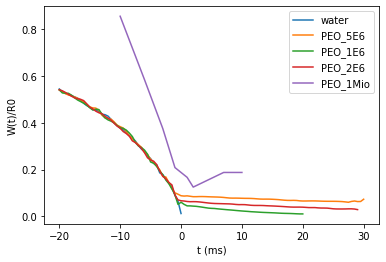

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Nov 30 12:27:03 2020

@author: lucas
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import csv


files=[r'eau_interp.txt', 
       r'PEO_5E6_interp.txt', 
       r'PEO_1E6_interp.txt', 
       r'PEO_2E6_interp.txt', 
       r'PEO_1Mio_interp.txt']

labels = [r'water', 'PEO_5E6', 'PEO_1E6', 'PEO_2E6', 'PEO_1Mio']
depth_k = len(files)

for k in range(depth_k):
    path_k=root+files[k]
    
    # Creating empty lists to write the time and width
    time=[]
    width=[]
    
    # Opening the file and writing time and width
    with open(path_k,'rt')as f:
      data = csv.reader(f)
      for row in data:
            time.append(float(row[0]))
            width.append(float(row[1]))
    # Converting to numpy array
    time = np.asarray(time)
    width = np.asarray(width)
    plt.plot(time,width)
    plt.xlabel("t (ms)")
    plt.legend(labels)
    plt.ylabel("W(t)/R0")